In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Generating toy data 
We've seen in class that choosing the right value of k can be tricky. In this example, we will load a toy dataset and study how to find the right value of k without looking at the data.

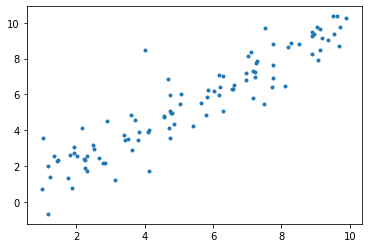

In [2]:
def generate_dataset(N=100):
    # generate some random data with noise
    rng = np.random.RandomState(1)
    x = 1. + (9. * rng.rand(N))
    TRUEW0,TRUEW1 = 1.0, 1.0
    y = TRUEW0*rng.randn(N) + TRUEW1 * x
    
    # add one outlier for showcasing
    x = [4] + list(x) 
    y = [8.5] + list(y)
    return np.matrix(x).T,np.array(y)

x,y = generate_dataset()

plt.plot(x, y, '.')

# Sci-kit learn 
Scit-kit learn (sklearn) is an open-source python library that contains efficient implementations of a broad range of machine learning algorithms. We will be using sklearn throughout this class so you must familiarize yourself with it. Load sklearn and try to train a k-NN regressor model for the given dataset.

In [3]:
from sklearn.neighbors import KNeighborsRegressor
k=1
# initialize the model
model = KNeighborsRegressor(n_neighbors=k)
model = model.fit(x, y)
y_pred = model.predict(x)

We can now use it to make predictions. 
The KNeighborsRegressor has the prediction function built-in, all we need to do is call the predict() function. For instance, in the code below, we will generate 10 "Hours Slept"-points, we then ask the model to give us its estimate of Happiness.

<font color=blue size =4>Inclass exercise</font>

In [4]:
# In-class exercise: use the predict function to predict how
# happy a person is after sleeping 1, 2, ..., 10 hours

if you sleep [1] hours, you will be 0.7 happy
if you sleep [2] hours, you will be 2.5 happy
if you sleep [3] hours, you will be 4.5 happy
if you sleep [4] hours, you will be 8.5 happy
if you sleep [5] hours, you will be 5.4 happy
if you sleep [6] hours, you will be 6.2 happy
if you sleep [7] hours, you will be 6.8 happy
if you sleep [8] hours, you will be 6.5 happy
if you sleep [9] hours, you will be 9.4 happy
if you sleep [10] hours, you will be 10.3 happy


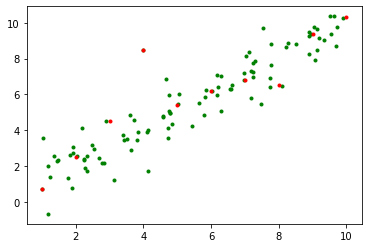

In [5]:
# compare the training data the predictions made for testing data 
plt.plot(x, y, 'g.')
plt.plot(hours_slept, happiness, 'r.')
plt.show()

# Define goodness of fit measure 
We use MSE as to measure goodness of fit for KNN regressor. Both numpy and sklearn have built-in functions that can help you calculate the MSE efficiently. 

<font color=blue size =4>Inclass exercise</font>

In [6]:
# In-class exercise: create a function
# that calculates the MSE for a dataset
# with the following inputs
#   model   : a previously trained model
#   x       : the original input data
#   y       : the original output data
#   returns : the mean-squared-error   
def model_mse(model, x, y):
    ...

# then call the function to messure the mse of the model that you have just defined 

model mse for 1-nn is 0.0


# Different k's 
Let's start by building three different models, one with small value of k, one with medium k and one with high k 

In [7]:
for k in [1, 15, 60]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x,y)
    mse = model_mse(model, x, y)
    print('when k={}, the model mse is {}'.format(k, round(mse, 3)))

when k=1, the model mse is 0.0
when k=15, the model mse is 0.981
when k=60, the model mse is 2.294


# Holdout testing to determine k
A model with k=1k=1 is perfect?! How come this doesn't match reality? The problem is that we are cheating. If we want to truly know if a model is good or not, we should look at how well it does on previously unseen data. The correct way to test a model is, therefore, to split it into two pieces. You use one piece (the train set) to train the model, the other piece (the test set) to test the model:

Let's do the splitting using numpy's indexing function 

In [8]:
cut = 15

# the train set is everything but the last 'cut' points
x_train, y_train = x[:-cut], y[:-cut]

# the test set contains the last 20 points
x_test, y_test = x[-cut:], y[-cut:]

Let us recalculate the MSE for the training and the test set. Of course, to do so we will need to retrain the models from scratch (since we're training it on a smaller data set).

In [9]:
def evaluate_model_mse(x_train, y_train, x_test, y_test, n_neighbours):
    # 1. train the model first using sklearn as before
    model = KNeighborsRegressor(n_neighbors=n_neighbours)
    model = model.fit(x_train,y_train)
    
    # 2. and evaluate the MSE
    MSE_train = model_mse(model, x_train, y_train)
    MSE_test  = model_mse(model, x_test, y_test)
    return (MSE_train,MSE_test)

print("Model\t| Train\t| Test")
print("NN(1)\t|  %2.2f\t|  %2.2f"   % evaluate_model_mse(x_train, y_train, x_test, y_test,1))
print("NN(15)\t|  %2.2f\t|  %2.2f"  % evaluate_model_mse(x_train, y_train, x_test, y_test,15))
print("NN(60)\t|  %2.2f\t|  %2.2f"  % evaluate_model_mse(x_train, y_train, x_test, y_test,60))


Model	| Train	| Test
NN(1)	|  0.00	|  2.41
NN(15)	|  0.96	|  1.19
NN(60)	|  3.27	|  2.22


<font color=blue size =4>Inclass exercise</font>

60


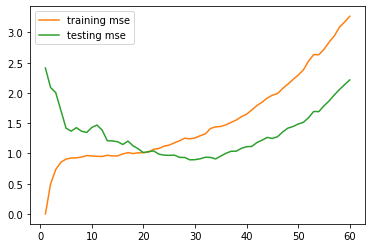

In [10]:
# In-class exercise: create a function that calculates 
# the MSE for a range of k values and plot the result.
# Hint: use your evaluate_model_mse function
import matplotlib.pyplot as plt

#plt.plot(...)